In [1]:
from  tensorflow.keras.models import Sequential
from  tensorflow.keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten
from keras.utils import plot_model
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

create the image data generator objects

In [7]:
train_datagen = ImageDataGenerator(rescale = 1/255, zoom_range = 0.2,horizontal_flip = True,vertical_flip = True)
test_datagen = ImageDataGenerator(rescale = 1/255, zoom_range = 0.2,horizontal_flip = True,vertical_flip = True)


read the images

In [3]:
# !unzip /content/fruits.zip

In [4]:
train = train_datagen.flow_from_directory(
    directory=r'D:\NLPDS\fruits\training_set',
    target_size=(64, 64),
    class_mode='binary'
)

Found 13 images belonging to 2 classes.


In [5]:
train.class_indices

{'apple': 0, 'orange': 1}

In [8]:
test = test_datagen.flow_from_directory(
    directory=r'D:\NLPDS\fruits\training_set',
    target_size=(64, 64),
    class_mode='binary'
)

Found 13 images belonging to 2 classes.


build the model

In [9]:
model = Sequential()
model.add(Input(shape = (64,64,3)))

model.add(Conv2D(filters=16, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       200,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 205,857 (804.13 KB)

 Trainable params: 205,857 (804.13 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.fit(train, validation_data=test, epochs=10, batch_size=1)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5385 - loss: 0.6967 - val_accuracy: 0.5385 - val_loss: 0.7461
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 0.5385 - loss: 0.7443 - val_accuracy: 0.6923 - val_loss: 0.6379
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 0.6154 - loss: 0.6468 - val_accuracy: 0.4615 - val_loss: 0.6421
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.4615 - loss: 0.6507 - val_accuracy: 1.0000 - val_loss: 0.5876
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 1.0000 - loss: 0.5803 - val_accuracy: 0.6923 - val_loss: 0.5734
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.7692 - loss: 0.5503 - val_accuracy: 0.8462 - val_loss: 0.5011
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.9231 - loss: 0.4986 - val_accuracy: 0.9231 - val_loss: 0.4732
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 1.0000 - loss: 0.4698 - val_accuracy: 1.0000 - val_loss: 0.

Prediction on new images

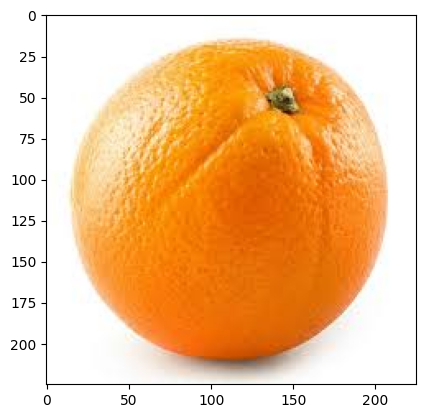

In [14]:
new1 = plt.imread(r"D:\NLPDS\fruits\sample1.jpg")
plt.imshow(new1)

In [15]:
new1 = cv2.resize(new1,(64,64))
new1 = new1.reshape(1,64,64,3)
result = model.predict(new1,verbose = False)
if result[0][0] ==1:
    print('Orange')
else:
    print('Apple')

Orange
